In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import pandas as pd   # read the csv file 
import matplotlib.pyplot as plt   #data visualization
import seaborn as sns #data visualization
import re  #regular expression
import string #was used during punctuation removal 

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.corpus import stopwords   # imported stop words for preprocessing
from nltk.corpus import wordnet     # Lemmitization  
from nltk.stem import WordNetLemmatizer   # Lemmitization 


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/lyrics toxicity/'

In [ ]:
lyrics_df = pd.read_csv(path + 'data/labeled_lyrics_cleaned.csv')  # reading the data
lyrics_df.head()   

,Unnamed: 0,artist,seq,song,label
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371


In [ ]:
lyrics_df.seq[1]

"The drinks go down and smoke goes up, I feel myself, got to let go\r\nMy cares get lost up in that crowd that go up, up and away yo\r\n\r\nSlow down the lights, eyes open wide\r\nWe live till we die, live till we die, live till we die\r\n\r\nAin't kill my vibe, don't blow my high, don't doubt that he from the band though\r\nI'm listening to this song, now I'm up up and away yo\r\n\r\nSlow down the lights, eyes open wide\r\nWe live till we die, live till we die, live till we die\r\nSlow down the lights, eyes open wide\r\nWe live till we die, live till we die, live till we die\r\nSlow down the lights, eyes open wide\r\nWe live till we die, live till we die, live till we die\r\n\r\nNights like this, I go all out, up so high, I can't come down\r\nLet me live just for right now\r\nYeah, yeah, bite me, I'm so gone\r\n\r\nHappier than a motherfucker, I can't feel my fa-ace\r\nNo squares in my circle, get up out my way\r\nHappier than a motherfucker, I can't feel my fa-ace\r\nWho you tryna da

In [ ]:
#drop unnecessary column : song, artist, Unnamed: 0

drop_cols=['Unnamed: 0','artist','song']
lyrics_df=lyrics_df.drop(columns=drop_cols)
lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158353 entries, 0 to 158352
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   seq     158353 non-null  object 
 1   label   158353 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
# create a column named toxicity using the label column
# if (label.values >= 0.9 ) = toxicity column = non_toxic
# esle toxicity column = toxic

sent_pred=[]
for i in range(len(lyrics_df['seq'])):
    if lyrics_df['label'][i]>=0.9:
        sent_pred.append('non_toxic')
    else:
        sent_pred.append('toxic') 

lyrics_df['toxicity']= sent_pred

In [ ]:
lyrics_df.toxicity.value_counts()

toxic        149377
non_toxic      8976
Name: toxicity, dtype: int64

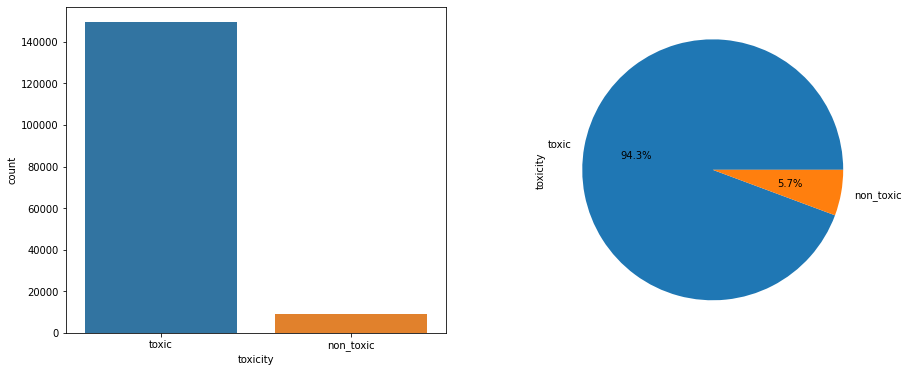

In [ ]:
#countplot and piechart for label column
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='toxicity', data=lyrics_df, ax=ax[0])
_ = lyrics_df['toxicity'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [ ]:
def clean(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)     #escape punctuation
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)                                 #replace line break with space
    text = re.sub('\w*\d\w*', ' ', text)                           #ignore digits
    text = ' '.join(text.split())                                   #replace whitespace with single space
    return text

In [ ]:
lyrics_df['clean_lyrics'] = lyrics_df['seq'].astype(str)                             # converts the seq column from object  to string
lyrics_df["clean_lyrics"] = lyrics_df['clean_lyrics'].apply(lambda x: clean(str(x))) # here x = lyrics_df['clean_lyrics'][i]

print(lyrics_df['clean_lyrics'][1])


The drinks go down and smoke goes up I feel myself got to let go My cares get lost up in that crowd that go up up and away yo Slow down the lights eyes open wide We live till we die live till we die live till we die Ain t kill my vibe don t blow my high don t doubt that he from the band though I m listening to this song now I m up up and away yo Slow down the lights eyes open wide We live till we die live till we die live till we die Slow down the lights eyes open wide We live till we die live till we die live till we die Slow down the lights eyes open wide We live till we die live till we die live till we die Nights like this I go all out up so high I can t come down Let me live just for right now Yeah yeah bite me I m so gone Happier than a motherfucker I can t feel my fa ace No squares in my circle get up out my way Happier than a motherfucker I can t feel my fa ace Who you tryna dance Get up out my way Happier than a motherfucker I can t feel my fa ace No squares in my circle get u

In [ ]:
stop_words = stopwords.words('english')

# Remove stop words
lyrics_df['clean_lyrics'] = lyrics_df['clean_lyrics'].str.split().apply(lambda x: [word for word in x if word not in stop_words]).apply(lambda x: ' '.join(x))

print(lyrics_df['clean_lyrics'][1])

The drinks go smoke goes I feel got let go My cares get lost crowd go away yo Slow lights eyes open wide We live till die live till die live till die Ain kill vibe blow high doubt band though I listening song I away yo Slow lights eyes open wide We live till die live till die live till die Slow lights eyes open wide We live till die live till die live till die Slow lights eyes open wide We live till die live till die live till die Nights like I go high I come Let live right Yeah yeah bite I gone Happier motherfucker I feel fa ace No squares circle get way Happier motherfucker I feel fa ace Who tryna dance Get way Happier motherfucker I feel fa ace No squares circle get way Happier motherfucker I feel fa ace Who tryna dance Get way When I night I chase neon lights All thoughts start echo yeah start echo Slow lights eyes open wide We live till die live till die live till die So I roll dice I hope I Don take I handle much I handle Slow lights eyes open wide We live till die live till die 

(-0.5, 399.5, 329.5, -0.5)

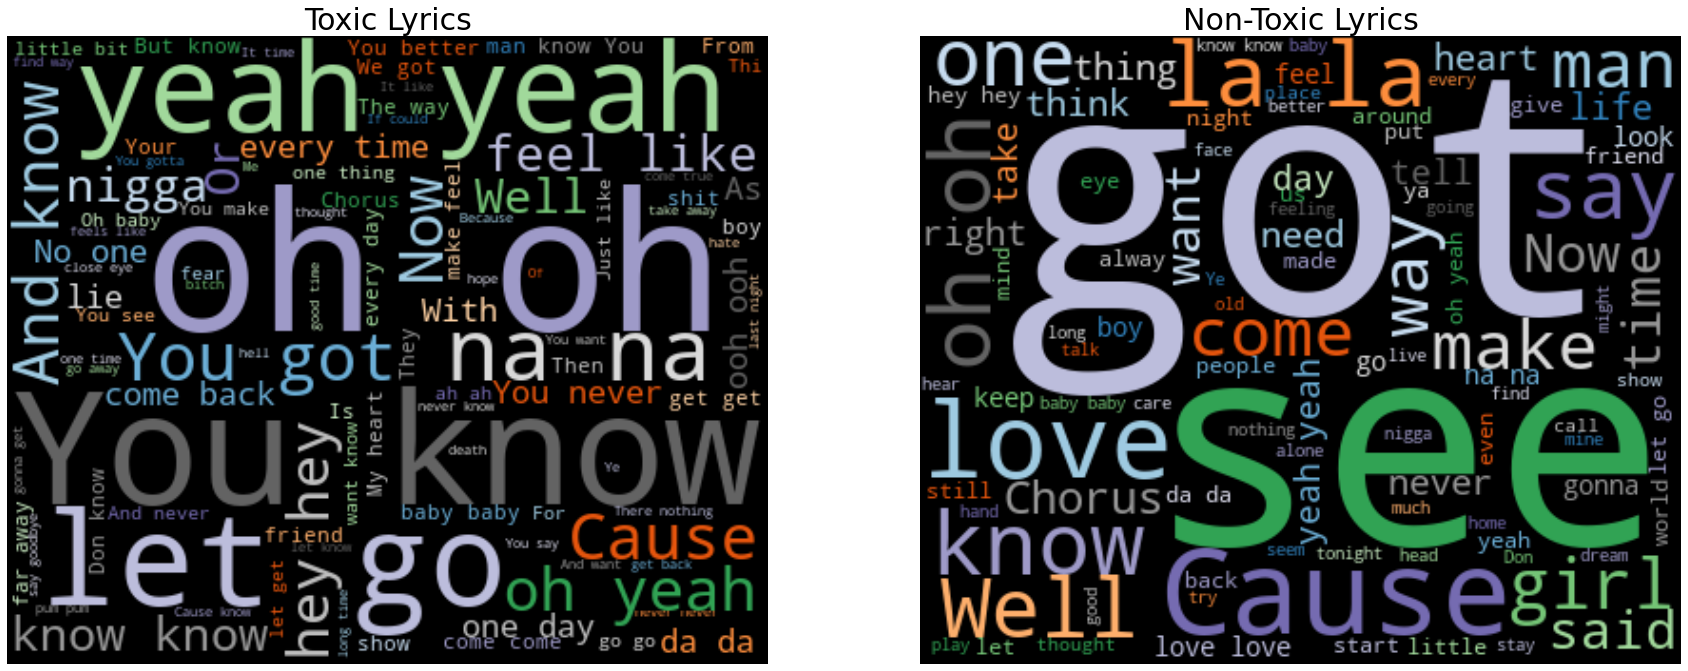

In [ ]:

lyrics_copy_df =  lyrics_df.copy()

# Start with one review:
df_tox = lyrics_copy_df[lyrics_copy_df['toxicity']=='toxic']
df_non_tox = lyrics_copy_df[lyrics_copy_df['toxicity']=='non_toxic']
df_All = " ".join(review for review in lyrics_copy_df.clean_lyrics)
wordcloud_tox = " ".join(review for review in df_tox.clean_lyrics)
wordcloud_non_tox = " ".join(review for review in df_non_tox.clean_lyrics)


fig, ax = plt.subplots(1, 2, figsize  = (30,24))
wordcloud_toxicity = WordCloud(width=400, height=330, max_words=100,colormap='tab20c',collocations=True).generate(wordcloud_tox)
wordcloud_non_toxicity = WordCloud(width=400, height=330, max_words=100, colormap='tab20c',collocations=True).generate(wordcloud_non_tox)

# Display the generated image:
ax[0].imshow(wordcloud_toxicity, interpolation='bilinear')
ax[0].set_title('Toxic Lyrics', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_non_toxicity, interpolation='bilinear')
ax[1].set_title('Non-Toxic Lyrics', fontsize=30)
ax[1].axis('off')


In [ ]:
#frequent words
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

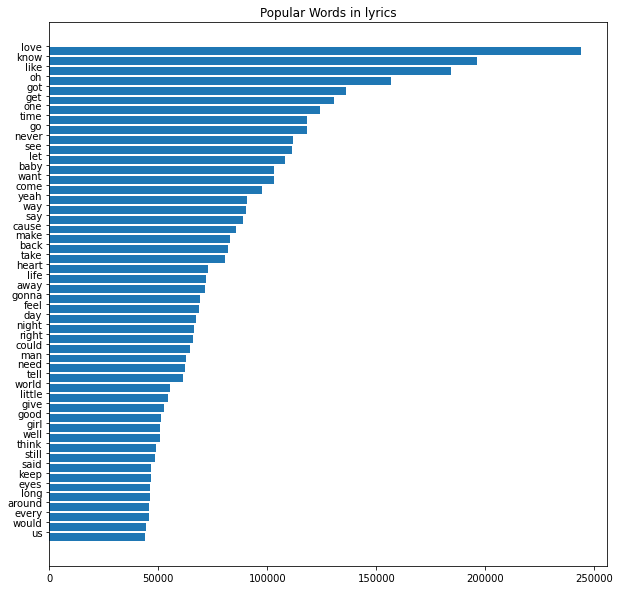

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(lyrics_df,'clean_lyrics',"Popular Words in lyrics")

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

lyrics_df["clean_lyrics"] = lyrics_df["clean_lyrics"].apply(lambda text: lemmatize_words(text))

print("After lemmatization : ",lyrics_df['clean_lyrics'][1])

After lemmatization :  The drink go smoke go I feel get let go My care get lose crowd go away yo Slow light eye open wide We live till die live till die live till die Ain kill vibe blow high doubt band though I listen song I away yo Slow light eye open wide We live till die live till die live till die Slow light eye open wide We live till die live till die live till die Slow light eye open wide We live till die live till die live till die Nights like I go high I come Let live right Yeah yeah bite I go Happier motherfucker I feel fa ace No square circle get way Happier motherfucker I feel fa ace Who tryna dance Get way Happier motherfucker I feel fa ace No square circle get way Happier motherfucker I feel fa ace Who tryna dance Get way When I night I chase neon light All thought start echo yeah start echo Slow light eye open wide We live till die live till die live till die So I roll dice I hope I Don take I handle much I handle Slow light eye open wide We live till die live till die li

In [ ]:
lyrics_df['clean_lyrics'] = lyrics_df['clean_lyrics'].str.lower()

In [ ]:
lyrics_df.to_csv(path + 'data/cleaned_df.csv',index = False)

In [ ]:
lyrics_df

0         no i ever trap bando but oh lord get wrong i k...
1         the drink go smoke go i feel get let go my car...
2         she live planet earth she find love venus word...
3         trippin grigio mobbin light low trippin grigio...
4         i see midnight panther gallant brave i find i ...
                                ...                        
158348    and live borrow time but headshot pretty good ...
158349    frozin time forever carrying torch long can he...
158350    hard girl so nice boy in room night not pretty...
158351    i want chose die and bury rubix cube and sleep...
158352    musical ladder leaning mountain bathed white l...
Name: clean_lyrics, Length: 158353, dtype: object